In [2]:
import sys
sys.path.append("/Users/anuram/Documents/hydrogenase-ftir/src")

In [3]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib
import numpy as np
import pandas as pd
#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtraction
from hydrogenase_processing.second_deriv import second_deriv, first_deriv
#testing
#find peaks
from scipy.signal import find_peaks, peak_widths

In [4]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_all_test_data = pathlib.Path("../../data/opus_files/subtraction_coefficient_testing") 

## Importing the Data form the local paths specified above ##

In [5]:
#Importing Water Vapor
wv_data = read_file(f'{path_to_water_vapor_data}''/water vapor 4cm-1.1')

In [6]:
#Pulling in all test data
second_derivative_test_raw_data = list(path_to_all_test_data.iterdir())
second_derivative_test_raw_data.sort()

#Initializing dict of raw spectra files from the file system
raw_data = dict()

#Populating the raw_test_data dict with all the read in raw opus files
for i in (second_derivative_test_raw_data):
    if not i.name.startswith('.DS_Store'):
        raw_data[i.name[0:4]] = read_file(i)

print(raw_data.keys())

dict_keys(['011a', '011b', '011c', '011d', '011e', '011f', '011g', '011h', '011i', '011k', '011l', '011m', '011n', '011o', '011p', '011q', '011r', '011s', '011t', '160 ', '162 ', '164 ', '165 ', '166 ', '167 ', '168 ', '169 ', '170 ', '171 ', '172 '])


In [7]:
test_comparisons_parameters_df = pd.read_excel("../../data/test_subtraction_coefficients.xlsx", sheet_name="uncut_samples")

#full_file_names = test_comparisons_parameters_df["file_name"]

test_comparisons_parameters_df["file_name"] = test_comparisons_parameters_df["file_name"].apply(lambda file_name: file_name[0:4]) 

#test_comparisons_parameters_df["file_name"] = exp_num_file_name


indexed_test_comparison_parameters = test_comparisons_parameters_df.set_index('file_name')


## Subtracting Water Vapor


In [8]:
#Initializing dict of post water vapor subtraction spectra
cut_range_sub_wv_data = dict()

results = list()

for idx, row in indexed_test_comparison_parameters.iterrows():  
    print(idx)
    if idx in raw_data:
        raw_data_i = raw_data[idx]
        cut_range_sub_wv_data[f'{idx}_cut_range_wv_sub'] = cut_range_subtraction(raw_data_i, wv_data, row["range_start"], row["range_end"], SG_poly = 3, SG_points = 21)
        subtraction_parameters = cut_range_sub_wv_data[f'{idx}_cut_range_wv_sub'][0][0].fit_atm_params
        results.append(subtraction_parameters[0])
    else:
        results.append(None)

indexed_test_comparison_parameters["pb_subtraction_coefficient"] = results

160 
2150.0 1800.0
959 1141
167 
2150.0 1800.0
959 1141
162 
2150.0 1800.0
959 1141
011a
2150.0 1800.0
959 1141
011b
2150.0 1850.0
959 1115
011c
2150.0 1850.0
959 1115
011d
2150.0 1850.0
959 1115
011e
2150.0 1850.0
959 1115
011f
2150.0 1850.0
959 1115
011g
2150.0 1850.0
959 1115
011h
2150.0 1850.0
959 1115
011i
2150.0 1850.0
959 1115
011j
011k
2150.0 1850.0
959 1115
011l
2150.0 1850.0
959 1115
011m
2150.0 1850.0
959 1115
011n
2150.0 1850.0
959 1115
011o
2150.0 1850.0
959 1115
011p
2150.0 1850.0
959 1115
011q
2150.0 1850.0
959 1115
011r
2150.0 1850.0
959 1115
011s
2150.0 1850.0
959 1115
011t
2150.0 1850.0
959 1115
164 
2150.0 1850.0
959 1115
165 
2150.0 1850.0
959 1115
166 
2150.0 1850.0
959 1115
168 
2150.0 1850.0
959 1115
169 
2150.0 1850.0
959 1115
170 
2150.0 1850.0
959 1115
171 
2150.0 1850.0
959 1115
172 
2150.0 1850.0
959 1115
173 
174 
175 
176 


# Get Second derivative


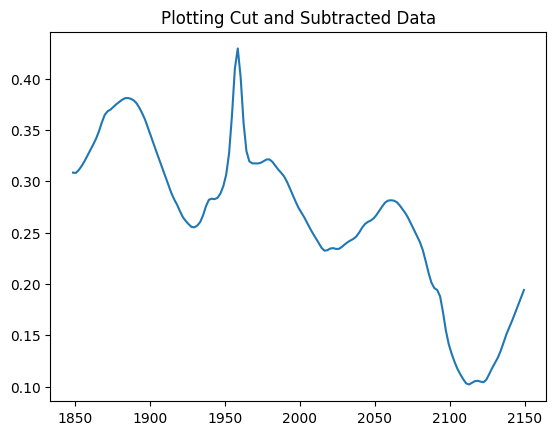

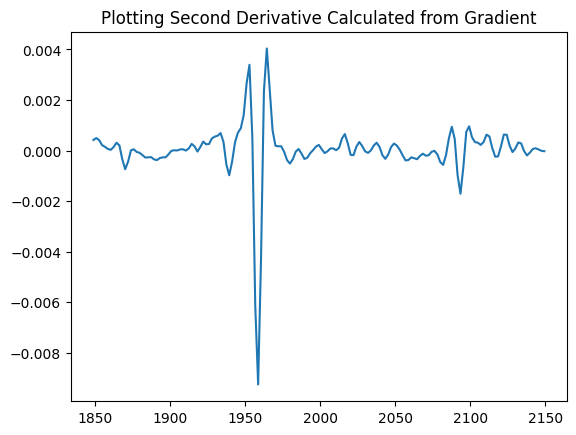

In [9]:
#Extracting wavenb and abs for one of the corrected spectra
example_cut_sub = cut_range_sub_wv_data["011b_cut_range_wv_sub"]

x = second_deriv(example_cut_sub, show_plots=True)


# Get Peaks


In [10]:
#because we want the peaks in the negative-y direction
d2ydx2_spl_upsidedown = x[1] * -1

#to determine what is the appropriate prominance parameter to use for different data
#attemptive method: calculate the peak height difference between each data points and take the average of the biggest 10 height difference results for the prominance parameter in find_peaks(), which gives a rough estimates of the signal scale

#function using for loop to subtract each data point with the next peak
peak_height_diff = []
for i in range(len(d2ydx2_spl_upsidedown)-1):    
    diff = d2ydx2_spl_upsidedown[i+1] - d2ydx2_spl_upsidedown[i]
    peak_height_diff.append(diff)

#sort the result list such that the peak height differences are listed from lowest to heighest
peak_height_diff.sort()

#average of top 10 data point height difference
#mean_diff = np.mean(peak_height_diff[len(peak_height_diff)-10:len(peak_height_diff)])

x peak value: [2093.4554263387386, 2081.415774936303, 1958.3103393464, 1939.0468971025034]
y peak value: [-0.0017127789989988273, -0.0005802789278481511, -0.009299687849316368, -0.000977246040388486]


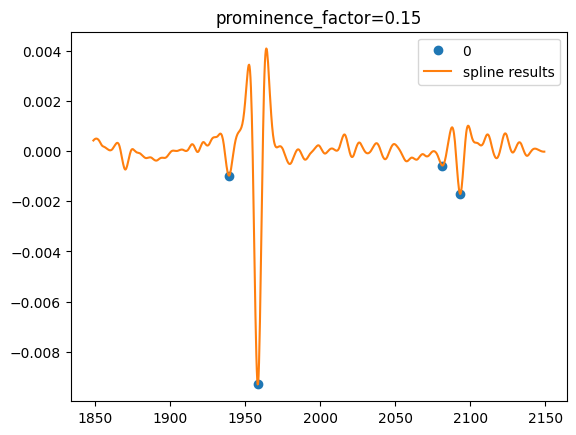

x peak value: [2093.4554263387386, 1958.3103393464]
y peak value: [-0.0017127789989988273, -0.009299687849316368]


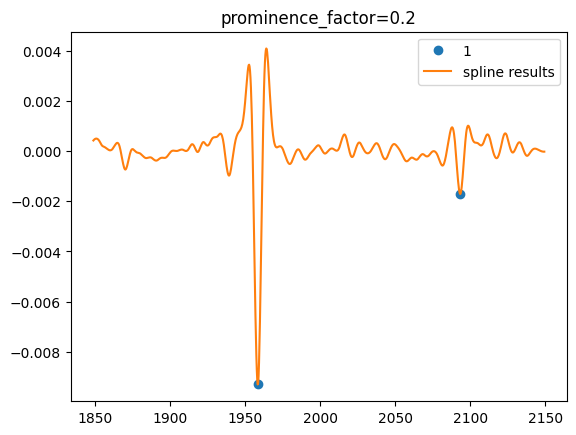

x peak value: [2093.4554263387386, 1958.3103393464]
y peak value: [-0.0017127789989988273, -0.009299687849316368]


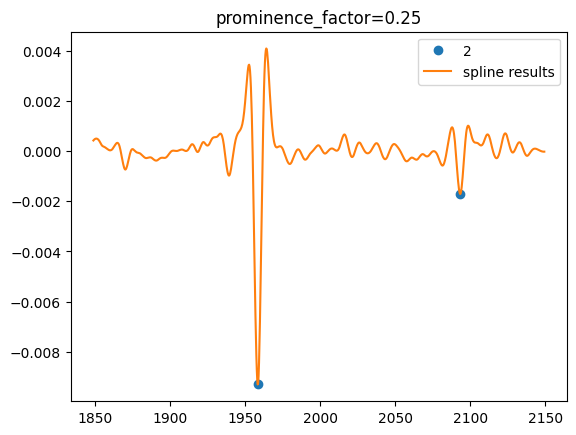

In [16]:
prominence_factor = [0.15, 0.2, 0.25]
for index in range(len(prominence_factor)):
    #top_ten_diffs = peak_height_diff[len(peak_height_diff)-10:len(peak_height_diff)]
    relative_height = prominence_factor[index] * max(d2ydx2_spl_upsidedown)

    #using the scipy peak finder to find peaks' indices in the 2nd derivative spline results
    peaks_index = find_peaks(d2ydx2_spl_upsidedown, prominence=relative_height)

    #use for loops to extract the coordinates of the peaks so we can plot them on the plot above
    d2ydx2_peak_val = []
    deriv_x_peak_val = []

    for i in peaks_index[0]:
        d2ydx2_peak = x[1][i]
        deriv_x_peak = x[2][i]

        d2ydx2_peak_val.append(d2ydx2_peak)
        deriv_x_peak_val.append(deriv_x_peak)
    print('x peak value:',deriv_x_peak_val)
    print('y peak value:',d2ydx2_peak_val)

    #plot the 2nd derivative with the peaks finder results
    plt.figure()
    plt.plot(deriv_x_peak_val, d2ydx2_peak_val, 'o', label = index)
    plt.plot(x[2], x[1], label = "spline results")
    plt.legend()

    plt.title(f'prominence_factor={prominence_factor[index]}')
    plt.show()

# Get Anchor points


In [ ]:
#get the peak widths
peak_wid = peak_widths(d2ydx2_spl_upsidedown, peaks_index[0], rel_height=1)
#peak_wid = peak_widths(x[1], peaks_index[0], rel_height=1)
print(peak_wid)

(array([434.11269801, 398.78371714,  34.81774997,  38.80651629]), array([-0.00100588, -0.00094143, -0.00343642, -0.00069154]), array([169.        , 204.        , 619.18225003, 679.19348371]), array([603.11269801, 602.78371714, 654.        , 718.        ]))


In [ ]:
#Get the start index and end index along with the wave numbers
width_endIdx = [int(x) for x in peak_wid[2]]
wv_endIdx =[]
sec_dev_endIdx = []
for i in width_endIdx:
    wv_endIdx.append(x[2][i])
    sec_dev_endIdx.append(x[1][i])


width_startIdx = [int(x) for x in peak_wid[3]]
wv_startIdx = []
sec_dev_startIdx = []
for i in width_startIdx:
    wv_startIdx.append(x[2][i])
    sec_dev_startIdx.append(x[1][i])



/tmp/ipykernel_1237/972215754.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(wv_startIdx, d2ydx2_spl_upsidedown[width_startIdx], 'ro', color = 'C2', label = 'start_idx')
/tmp/ipykernel_1237/972215754.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(wv_endIdx, d2ydx2_spl_upsidedown[width_endIdx], 'ro', color = 'C4', label = 'end_index')


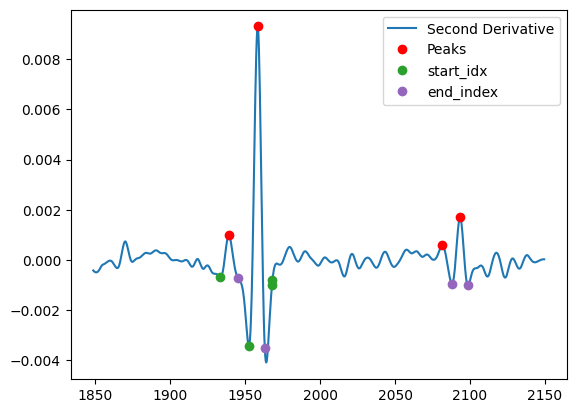

In [ ]:
plt.plot(x[2], d2ydx2_spl_upsidedown, label='Second Derivative')
# Plot peaks on the second derivative plot
plt.plot(deriv_x_peak_val, d2ydx2_spl_upsidedown[peaks_index[0]], 'ro', label='Peaks')
plt.plot(wv_startIdx, d2ydx2_spl_upsidedown[width_startIdx], 'ro', color = 'C2', label = 'start_idx')
plt.plot(wv_endIdx, d2ydx2_spl_upsidedown[width_endIdx], 'ro', color = 'C4', label = 'end_index')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(wv_startIdx)
print(wv_endIdx)

[1967.9420604683485, 1968.2430517534094, 1952.5915049302432, 1933.3280626863464]
[2098.5722781847735, 2088.0375832076425, 1963.1261999073743, 1945.066722803721]


In [ ]:
anchor_points_from_second_deriv = []
for wavenb in wv_startIdx:
    anchor_points_from_second_deriv.append(wavenb)
for wavenb in wv_endIdx:
    anchor_points_from_second_deriv.append(wavenb)

anchor_points_from_second_deriv = set(anchor_points_from_second_deriv)
x_wavenb = example_cut_sub[0][0].wavenb
#absorbance y values
y_corr_abs = example_cut_sub[0][0].sub_spectrum

In [ ]:
#addition from Eric
anchor_points_raw_data = x_wavenb

#for loop to compute the left hand side and right hand side peak width for each peak, then put them into a list
peak_wid_2_sides = []
for i in range(len(deriv_x_peak_val)):
    left_wid = deriv_x_peak_val[i] - wv_startIdx[i]
    right_wid = wv_endIdx[i] - deriv_x_peak_val[i]
    peak_wid_2_sides.append([left_wid, right_wid])

print(peak_wid_2_sides)

#for loops to decide which anchor point should be included becuase it is far enought away from the peak
post_process_anchor_points = []
post_process_anchor_points_abs = []

peak_correspondence = []
anchorpt_peak_correspondence = []
#adjustment factor of the peak width
adj_factor = 1

# Peaking sorting: subtract each anchor point wi the peak and compare which difference is the smallest among the peaks and this one anchor point to figure out which peak this anchor point is close to
for index in range(len(anchor_points_raw_data)):
    print(anchor_points_raw_data[index])
    peak_to_anchor = []
    # for every peak
    for i in range(len(deriv_x_peak_val)):
        print('peak',i, 'is', deriv_x_peak_val[i])
        #peak sorting
        pa_distance = abs(deriv_x_peak_val[i] - anchor_points_raw_data[index])
        peak_to_anchor.append(pa_distance)
    index_of_min = peak_to_anchor.index(min(peak_to_anchor))
    print(anchor_points_raw_data[index], 'is closer to peak', index_of_min)
    peak_correspondence.append(index_of_min)
anchorpt_peak_correspondence = [anchor_points_raw_data, peak_correspondence]

        
#for loop: 1st: determine is the anchor point on the left or right of the corresponding peak, 2nd compare the difference between the anchor points and the peak against the peak width stored in peak_wid_2_sides to determine if they are far enough away from the peak         
for index in range(len(anchor_points_raw_data)):
        corr_peak_index = anchorpt_peak_correspondence[1]
        if anchor_points_raw_data[index] < deriv_x_peak_val[corr_peak_index[index]]:
            print('on the left of', deriv_x_peak_val[anchorpt_peak_correspondence[1][index]])
            if deriv_x_peak_val[corr_peak_index[index]] - anchor_points_raw_data[index] > peak_wid_2_sides[corr_peak_index[index]][0]*adj_factor:
                print('include')
                post_process_anchor_points.append(anchor_points_raw_data[index])
                post_process_anchor_points_abs.append(y_corr_abs[index])
        else:
            print('on the right of', deriv_x_peak_val[i])
            if anchor_points_raw_data[index] - deriv_x_peak_val[corr_peak_index[index]] > peak_wid_2_sides[corr_peak_index[index]][1]*adj_factor:
                print('include')
                post_process_anchor_points.append(anchor_points_raw_data[index])
                post_process_anchor_points_abs.append(y_corr_abs[index])


#post processesing to avoid repeating values and make sure the wavenumbers are in the same acending or decending order
post_process_anchor_data = pd.DataFrame({'wavenumber': post_process_anchor_points, 'absorbance': post_process_anchor_points_abs})
post_process_anchor_data = post_process_anchor_data.drop_duplicates()
anchor_data_sorted = post_process_anchor_data.sort_values(by='wavenumber').reset_index()
print(anchor_data_sorted)

[[125.51336587039009, 5.116851846034933], [113.1727231828936, 6.621808271339432], [5.718834416156824, 4.815860560974215], [5.718834416157051, 6.019825701217542]]
2149.4398053600635
peak 0 is 2093.4554263387386
peak 1 is 2081.415774936303
peak 2 is 1958.3103393464
peak 3 is 1939.0468971025034
2149.4398053600635 is closer to peak 0
2147.5123034768853
peak 0 is 2093.4554263387386
peak 1 is 2081.415774936303
peak 2 is 1958.3103393464
peak 3 is 1939.0468971025034
2147.5123034768853 is closer to peak 0
2145.584801593707
peak 0 is 2093.4554263387386
peak 1 is 2081.415774936303
peak 2 is 1958.3103393464
peak 3 is 1939.0468971025034
2145.584801593707 is closer to peak 0
2143.6572997105286
peak 0 is 2093.4554263387386
peak 1 is 2081.415774936303
peak 2 is 1958.3103393464
peak 3 is 1939.0468971025034
2143.6572997105286 is closer to peak 0
2141.72979782735
peak 0 is 2093.4554263387386
peak 1 is 2081.415774936303
peak 2 is 1958.3103393464
peak 3 is 1939.0468971025034
2141.72979782735 is closer to p

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

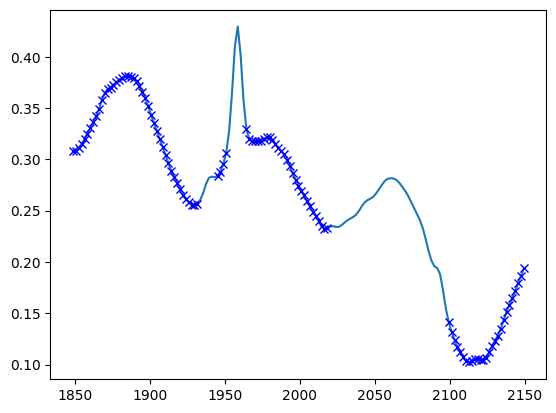

In [ ]:
plt.plot(x_wavenb, y_corr_abs)
#plt.plot(anchor_points_raw_data, anchor_points_absorbance, 'ro')
plt.plot(post_process_anchor_data['wavenumber'], post_process_anchor_data['absorbance'], 'bx')
plt.plot